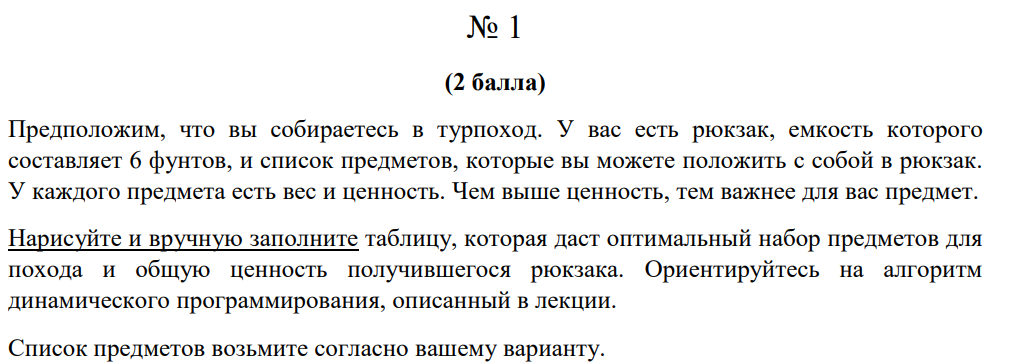
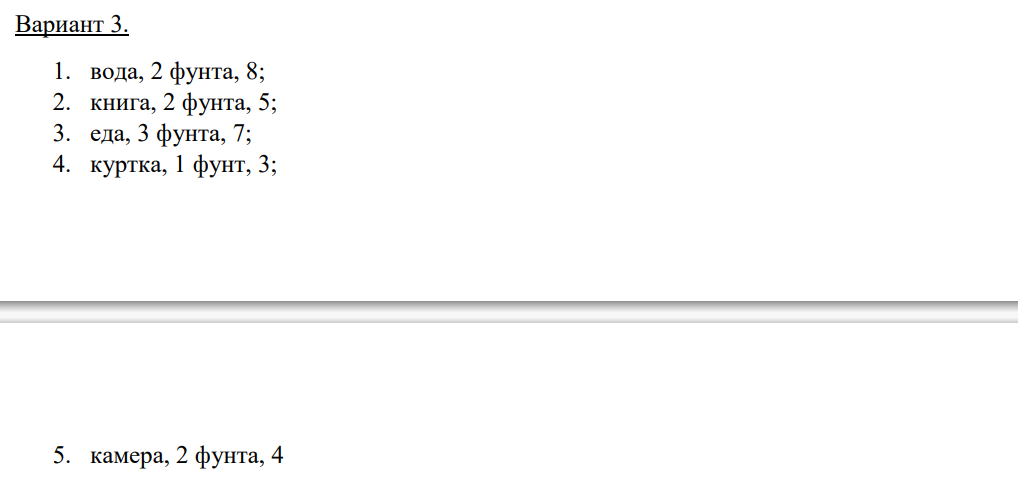

# Результат:
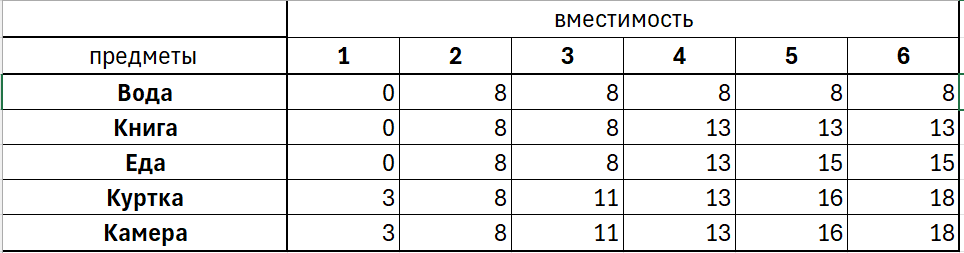

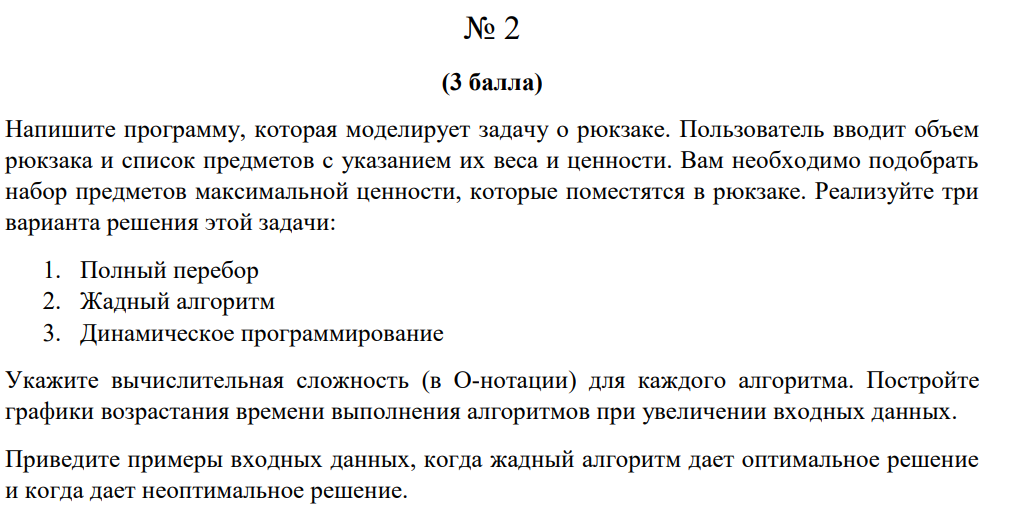

In [3]:
import random
import time


class Item:
    def __init__(self, weight: int, value: int, name: str = ""):
        self.weight = weight
        self.value = value
        self.name = name or f"item({weight},{value})"
        
    def __repr__(self):
        return f"{self.name}(w={self.weight}, v= {self.value})"


def complete_bust(capacity,items):
    """Полный перебор  
    return best_value, best_subset"""
    n = len(items)
    best_value = 0
    best_subset = []
    
    for mask in range(1 << n):
        total_w = 0
        total_v = 0
        subset = []
        for i in range(n):
            if mask & (1 << i):
                total_w += items[i].weight
                total_v += items[i].value
                subset.append(items[i])
        if total_w <= capacity and total_v > best_value:
            best_value = total_v
            best_subset = subset

    return best_value, best_subset


def greedy_algorithm(capacity,items):
    """Жадный алгоритм  
    return total_v, chosen"""
    sorted_items = sorted (items, key=lambda it: it.value / it.weight, reverse=True)
    total_w = 0
    total_v = 0
    chosen = []
    
    for it in sorted_items:
        if total_w + it.weight <= capacity:
            chosen.append(it)
            total_w += it.weight
            total_v += it.value
            
    return total_v, chosen
    
    
def dynamic_programming(capacity,items):
    """Динамическое программирование  
    return res_value, chosen"""
    n = len(items)
    dp = [[0] * (capacity + 1) for _ in range(n+1)]
    
    for i in range(1,n+1):
        w_i = items[i-1].weight
        v_i = items[i-1].value
        
        for w in range(0,capacity + 1):
            if w_i > w:
                dp[i][w] = dp[i-1][w]
            else:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w-w_i] + v_i)
    
    res_value = dp[n][capacity]
    w = capacity
    chosen = []
    
    for i in range(n,0,-1):
        if dp[i][w] != dp[i-1][w]:
            chosen.append(items[i-1])
            w -= items[i-1].weight
    
    chosen.reverse()
    return res_value, chosen


def read_input():
    """Ввод данных пользователя  
    return capacity, items"""
    print("Введите вместимость рюкзака:")
    capacity = int(input().strip())
    
    print("Введите количество предметов")
    n = int(input().strip())
    
    items = []
    print("Введите предметы(имя вес ценность)")
    for i in range(n):
        parts = input().strip().split()
        if len(parts) == 3:
            name, w, v = parts[0], int(parts[1]), int(parts[2])
        else:
            name = f"item{i}"
            w, v = map(int, parts)
        items.append(Item(w, v, name))
    
    return capacity, items


def measure_time(func, *args, repeats = 3):
    """Замер времени"""    
    total = 0.0
    for _ in range(repeats):
        start = time.perf_counter()
        func(*args)
        end = time.perf_counter()
        total += (end - start)
        
    return total/repeats


def gen_rand_items(n, max_weight = 50, max_value = 100):
    """Генератор случайных чисел"""
    items = []
    for i in range(n):
        w = random.randint(1, max_weight)
        v = random.randint(1, max_value)
        items.append(Item(w, v, f"it{i}"))
    
    return items


def benchmark():
    random.seed(0)
    
    capacities = [50]
    ns = [5,8,10,12,14,16,18]
    
    print("n, capacity, algo, time_sec")
    for C in capacities:
        for n in ns:
            items = gen_rand_items(n)
            
            t_compelete = measure_time(complete_bust, C, items, repeats=1)
            print(f"{n}, {C}, Полный, {t_compelete:.6f}")
            
            t_greedy = measure_time(greedy_algorithm, C, items)
            print(f"{n}, {C}, Жадный, {t_greedy:.6f}")
            
            t_dynamic = measure_time(dynamic_programming, C, items)
            print(f"{n}, {C}, Динамич. програм., {t_dynamic:.6f}")
            
            
def greedy_examples():
    print("Жадный метод даёт оптимум")
    C = 6
    items1 = [
        Item(2,4,"A"),
        Item(2,4,"B"),
        Item(2,4,"C"),
    ]
    
    opt_v1, opt_set1 = dynamic_programming(C, items1)
    gr_v1, gr_set1 = greedy_algorithm(C, items1)
    
    print(f"capacity = {C}")
    print(f"items: {items1}")
    print(f"Dp value: {opt_v1}, set: {opt_set1}")
    print(f"Greedy value: {gr_v1}, set: {gr_set1}")
    
    print("Жадный метод не даёт оптимум")
    
    C = 50
    items2 = [
        Item(10,60,"I1"),
        Item(20,100,"I2"),
        Item(30,120,"I3"),
    ]
    
    opt_v2, opt_set2 = dynamic_programming(C, items2)
    gr_v2, gr_set2 = greedy_algorithm(C, items2)
    
    print(f"capacity = {C}")
    print(f"items: {items2}")
    print(f"Dp value: {opt_v2}, set: {opt_set2}")
    print(f"Greedy value: {gr_v2}, set: {gr_set2}")
    
    
def main():
    while True:
        print("Выберите режим:")
        print("1 - решить задачу для своих данных")
        print("2 - запустить бенчмарк (для графиков)")
        print("3 - показать примеры для жадного алгоритма")
        mode = input().strip()

        if mode == "0":
            break
        
        elif mode == "1":
            capacity, items = read_input()
            print("\nВаши данные:")
            print("Вместимость:", capacity)
            print("Предметы:", items)

            v_b, set_b = complete_bust(capacity, items)
            v_g, set_g = greedy_algorithm(capacity, items)
            v_d, set_d = dynamic_programming(capacity, items)

            print("\n=== Полный перебор ===")
            print("Макс. ценность:", v_b)
            print("Набор:", set_b)

            print("\n=== Жадный алгоритм ===")
            print("Ценность:", v_g)
            print("Набор:", set_g)

            print("\n=== Динамическое программирование ===")
            print("Макс. ценность:", v_d)
            print("Набор:", set_d)

        elif mode == "2":
            benchmark()
        elif mode == "3":
            greedy_examples()
        else:
            print("Неизвестный режим")


if __name__ == "__main__":
    main()

Выберите режим:
1 - решить задачу для своих данных
2 - запустить бенчмарк (для графиков)
3 - показать примеры для жадного алгоритма
Неизвестный режим
Выберите режим:
1 - решить задачу для своих данных
2 - запустить бенчмарк (для графиков)
3 - показать примеры для жадного алгоритма
Введите вместимость рюкзака:
Введите количество предметов
Введите предметы(имя вес ценность)

Ваши данные:
Вместимость: 6
Предметы: [вода(w=2, v= 8), книга(w=2, v= 5), еда(w=3, v= 7), куртка(w=1, v= 3), камера(w=2, v= 4)]

=== Полный перебор ===
Макс. ценность: 18
Набор: [вода(w=2, v= 8), еда(w=3, v= 7), куртка(w=1, v= 3)]

=== Жадный алгоритм ===
Ценность: 16
Набор: [вода(w=2, v= 8), куртка(w=1, v= 3), книга(w=2, v= 5)]

=== Динамическое программирование ===
Макс. ценность: 18
Набор: [вода(w=2, v= 8), еда(w=3, v= 7), куртка(w=1, v= 3)]
Выберите режим:
1 - решить задачу для своих данных
2 - запустить бенчмарк (для графиков)
3 - показать примеры для жадного алгоритма
n, capacity, algo, time_sec
5, 50, Полный, 

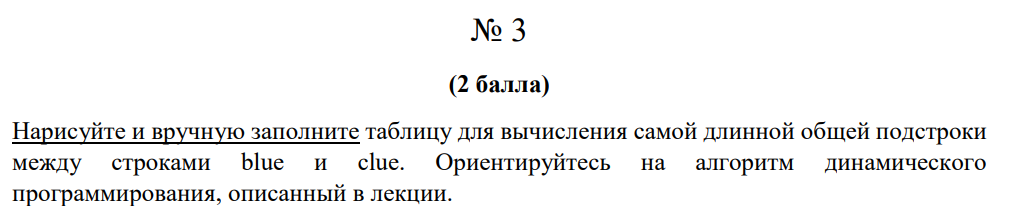

# Решение
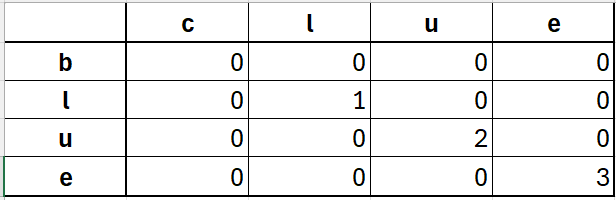

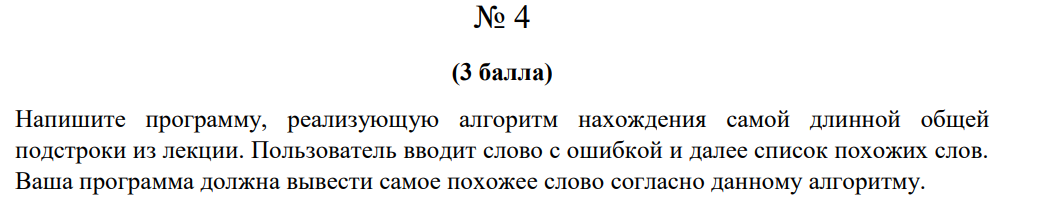

In [6]:
def longest_common_substring_len(s1: str, s2: str) -> int:
    """Длина наибольшей общей подстроки между s1 и s2  
    return best"""
    n, m = len(s1), len(s2)
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    best = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
                if dp[i][j] > best:
                    best = dp[i][j]
            else:
                dp[i][j] = 0
    return best


def most_similar_by_lcsu(misspelled: str, candidates: list[str]) -> str:
    """Возвращает слово-кандидат с максимальной длиной общей подстроки  
    return best_word"""
    best_word = None
    best_score = -1

    for w in candidates:
        score = longest_common_substring_len(misspelled, w)
        if score > best_score:
            best_score = score
            best_word = w
    return best_word


def main():
    print("Введите слово с ошибкой:")
    mis = input().strip()
    print(mis)

    print("Введите похожие слова через пробел:")
    cand_line = input().strip()
    candidates = cand_line.split()
    print(*candidates)

    if not candidates:
        print("Список кандидатов пуст.")
        return

    best = most_similar_by_lcsu(mis, candidates)
    print("Самое похожее слово:", best)


if __name__ == "__main__":
    main()


Введите слово с ошибкой:
blie
Введите похожие слова через пробел:
blue clue black
Самое похожее слово: blue


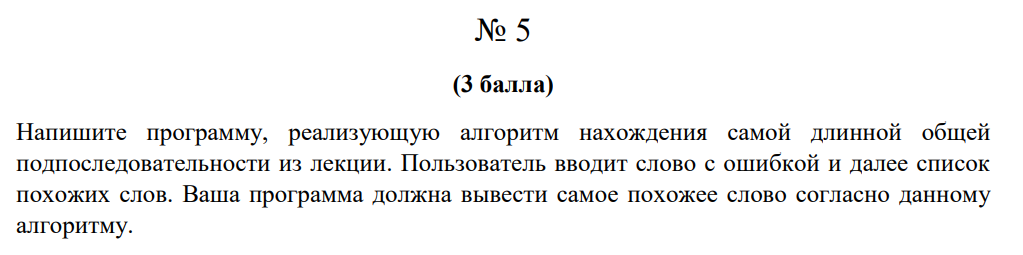

In [9]:
def lcs_length(a: str, b: str) -> int:
    """
    Длина самой длинной общей подпоследовательности строк a и b  
    return dp[n][m]"""
    n, m = len(a), len(b)
    # dp[i][j] — длина LCS для a[:i] и b[:j]
    dp = [[0] * (m + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if a[i - 1] == b[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    return dp[n][m]


def most_similar_by_lcs(misspelled: str, candidates: list[str]) -> str:
    """
    Возвращает слово-кандидат с максимальной длиной общей подпоследовательности с misspelled  
    При равенстве берётся первое по порядку  
    return best_word"""
    best_word = None
    best_score = -1

    for w in candidates:
        score = lcs_length(misspelled, w)
        if score > best_score:
            best_score = score
            best_word = w
    return best_word


def main():
    print("Введите слово с ошибкой:")
    mis = input().strip()
    print(mis)

    print("Введите похожие слова через пробел:")
    cand_line = input().strip()
    candidates = cand_line.split()
    print(*candidates)

    if not candidates:
        print("Список кандидатов пуст.")
        return

    best = most_similar_by_lcs(mis, candidates)
    print("Самое похожее слово:", best)


if __name__ == "__main__":
    main()


Введите слово с ошибкой:
blie
Введите похожие слова через пробел:
blue clue black
Самое похожее слово: blue


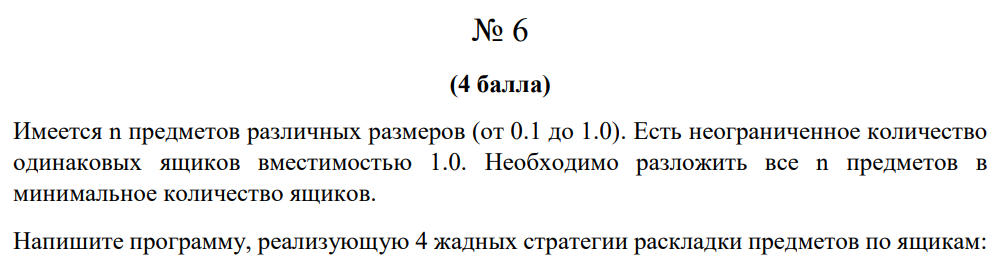
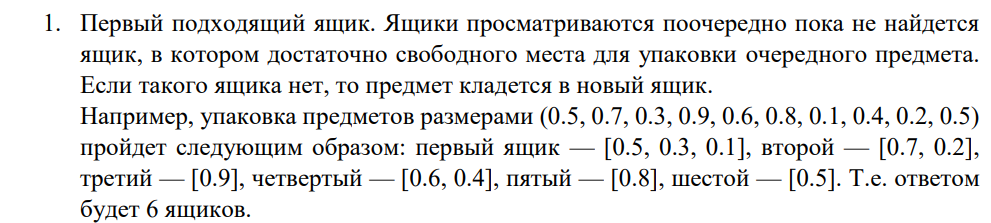
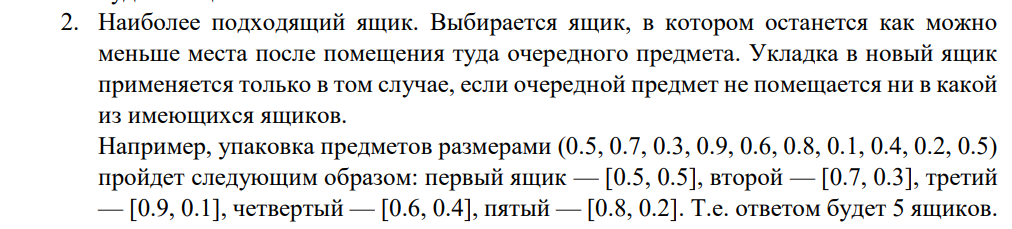
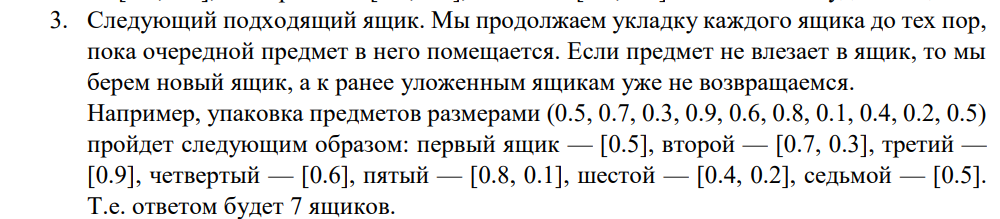
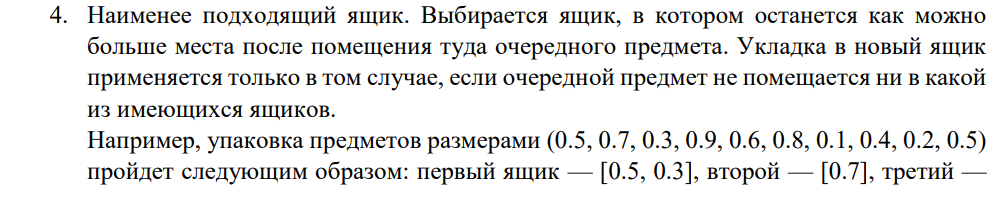
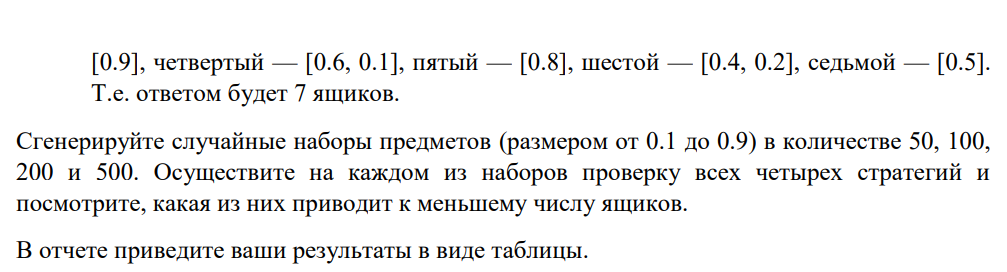

In [11]:
import random


BIN_CAPACITY = 1.0


def first_fit(items):
    """Первый подходящий ящик"""
    bins = [] 

    for x in items:
        placed = False
        for i in range(len(bins)):
            if bins[i] + x <= BIN_CAPACITY:
                bins[i] += x
                placed = True
                break
        if not placed:
            bins.append(x)
    return len(bins)


def best_fit(items):
    """Наиболее подходящий ящик"""
    bins = []

    for x in items:
        best_index = -1
        best_free_after = None

        for i in range(len(bins)):
            if bins[i] + x <= BIN_CAPACITY:
                free_after = BIN_CAPACITY - (bins[i] + x)
                if best_free_after is None or free_after < best_free_after:
                    best_free_after = free_after
                    best_index = i

        if best_index == -1:
            bins.append(x)
        else:
            bins[best_index] += x

    return len(bins)


def next_fit(items):
    """Следующий подходящий ящик"""
    if not items:
        return 0

    bins = 1
    current_fill = 0.0

    for x in items:
        if current_fill + x <= BIN_CAPACITY:
            current_fill += x
        else:
            bins += 1
            current_fill = x

    return len(str(bins)) and bins


def worst_fit(items):
    """Наименее подходящий ящик"""
    bins = []

    for x in items:
        worst_index = -1
        worst_free_after = None

        for i in range(len(bins)):
            if bins[i] + x <= BIN_CAPACITY:
                free_after = BIN_CAPACITY - (bins[i] + x)
                if worst_free_after is None or free_after > worst_free_after:
                    worst_free_after = free_after
                    worst_index = i

        if worst_index == -1:
            bins.append(x)
        else:
            bins[worst_index] += x

    return len(bins)


def generate_items(n):
    """Генерация n случайных предметов от 0.1 до 0.9."""
    return [round(random.uniform(0.1, 0.9), 2) for _ in range(n)]


def test_for_sizes(sizes, seed=0):
    random.seed(seed)

    print("| n  | First Fit | Best Fit | Next Fit | Worst Fit |")
    print("|----|-----------|----------|----------|-----------|")

    for n in sizes:
        items = generate_items(n)

        ff = first_fit(items)
        bf = best_fit(items)
        nf = next_fit(items)
        wf = worst_fit(items)

        print(f"| {n:<3} | {ff:<9} | {bf:<8} | {nf:<8} | {wf:<9} |")


def main():
    sizes = [50, 100, 200, 500]
    test_for_sizes(sizes)


if __name__ == "__main__":
    main()


| n  | First Fit | Best Fit | Next Fit | Worst Fit |
|----|-----------|----------|----------|-----------|
| 50  | 34        | 33       | 40       | 35        |
| 100 | 60        | 59       | 72       | 63        |
| 200 | 105       | 103      | 133      | 118       |
| 500 | 263       | 258      | 329      | 296       |


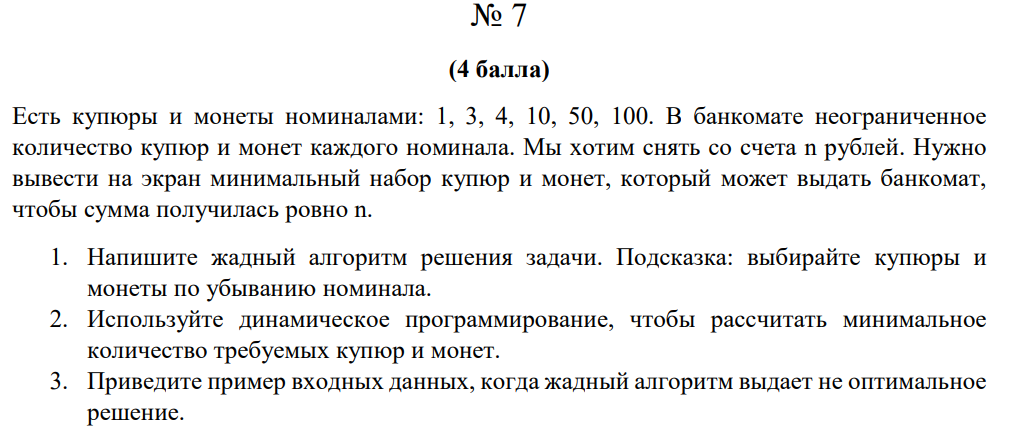

In [12]:
DENOMS = [100, 50, 10, 4, 3, 1]


def greedy_change(n: int):
    """Жадный алгоритм: берём самые крупные подходящие номиналы"""
    result = []
    remaining = n
    for coin in sorted(DENOMS, reverse=True):
        while remaining >= coin:
            remaining -= coin
            result.append(coin)
    return result


def dp_change(n: int):
    """
    Динамическое программирование: минимальное число монет/купюр  
    Возвращает список номиналов, дающих сумму n, с минимальным количеством элементов
    """
    INF = 10 ** 9
    dp = [INF] * (n + 1)
    prev_coin = [-1] * (n + 1)

    dp[0] = 0

    for s in range(1, n + 1):
        for coin in DENOMS:
            if coin <= s and dp[s - coin] + 1 < dp[s]:
                dp[s] = dp[s - coin] + 1
                prev_coin[s] = coin

    if dp[n] == INF:
        return []

    res = []
    cur = n
    while cur > 0:
        c = prev_coin[cur]
        res.append(c)
        cur -= c
    return res


def print_solution(title: str, coins: list[int]):
    if not coins:
        print(title, ": решение не найдено")
        return
    print(title, ":")
    print("  Количество купюр/монет:", len(coins))
    print("  Набор:", coins)
    print("  Сумма:", sum(coins))


def main():
    print("Доступные номиналы:", DENOMS)
    while True:
        s = input("\nВведите сумму n (или 0 для выхода): ").strip()
        if not s:
            continue
        try:
            n = int(s)
        except ValueError:
            print("Введите целое число.")
            continue

        if n == 0:
            print("Выход.")
            break

        greedy_res = greedy_change(n)
        dp_res = dp_change(n)

        print_solution("Жадный алгоритм", greedy_res)
        print_solution("Динамическое программирование", dp_res)

        if greedy_res and dp_res:
            print("\nСравнение длин:")
            print("  Жадный:", len(greedy_res), "монет")
            print("  ДП    :", len(dp_res), "монет")


if __name__ == "__main__":
    main()


Доступные номиналы: [100, 50, 10, 4, 3, 1]
Жадный алгоритм :
  Количество купюр/монет: 3
  Набор: [4, 1, 1]
  Сумма: 6
Динамическое программирование :
  Количество купюр/монет: 2
  Набор: [3, 3]
  Сумма: 6

Сравнение длин:
  Жадный: 3 монет
  ДП    : 2 монет
Выход.


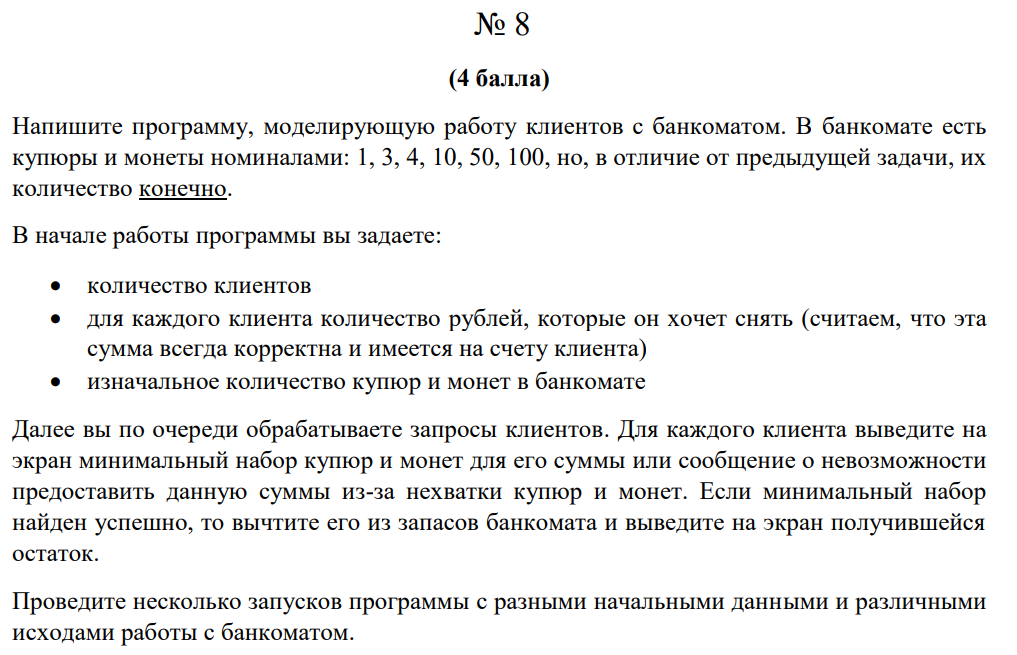

In [15]:
DENOMS = [1, 3, 4, 10, 50, 100]


def min_coins_limited(amount: int, stock: dict[int, int]):
    """
    Минимальное число монет при ограниченных количествах.
    stock: {номинал: доступное_кол-во}
    Возвращает (used, total_count) или (None, None), если нельзя выдать сумму.
    used — словарь {номинал: сколько взять}.
    """
    INF = 10 ** 9
    dp = [(INF, None) for _ in range(amount + 1)]
    dp[0] = (0, {d: 0 for d in DENOMS})

    for coin in DENOMS:
        max_cnt = stock.get(coin, 0)
        if max_cnt == 0:
            continue

        for s in range(amount, -1, -1):
            cur_cnt, cur_used = dp[s]
            if cur_cnt == INF:
                continue
            for k in range(1, max_cnt + 1):
                ns = s + coin * k
                if ns > amount:
                    break
                if cur_used[coin] + k > max_cnt:
                    break
                new_cnt = cur_cnt + k
                if new_cnt < dp[ns][0]:
                    new_used = cur_used.copy()
                    new_used[coin] += k
                    dp[ns] = (new_cnt, new_used)

    if dp[amount][0] == INF:
        return None, None
    return dp[amount][1], dp[amount][0]


def print_stock(stock: dict[int, int]):
    print("Остаток в банкомате:")
    for d in sorted(DENOMS):
        print(f"  {d}: {stock.get(d, 0)}")


def main():
    print("Введите начальное количество купюр/монет по номиналам:")
    atm_stock = {}
    for d in DENOMS:
        atm_stock[d] = int(input(f"{d}: ").strip())
        print(f"{d}: {atm_stock[d]}")

    print("\nВведите количество клиентов:")
    m = int(input().strip())
    print(m)
    
    requests = []
    for i in range(m):
        val = int(input(f"Сумма для клиента {i+1}: ").strip())
        requests.append(val)

    print("\n--- Обработка клиентов ---")
    for i, amount in enumerate(requests, start=1):
        print(f"\nКлиент {i}, сумма = {amount}")
        used, cnt = min_coins_limited(amount, atm_stock)

        if used is None:
            print("Невозможно выдать эту сумму при текущем остатке купюр.")
            continue

        print("Минимальный набор купюр/монет:")
        for d in sorted(DENOMS, reverse=True):
            if used[d] > 0:
                print(f"  {d} x {used[d]}")
        print("Всего купюр/монет:", cnt)

        for d in DENOMS:
            atm_stock[d] -= used[d]

        print_stock(atm_stock)


if __name__ == "__main__":
    main()


Введите начальное количество купюр/монет по номиналам:
1: 5
3: 3
4: 2
10: 2
50: 1
100: 0

Введите количество клиентов:
3

--- Обработка клиентов ---

Клиент 1, сумма = 17
Минимальный набор купюр/монет:
  10 x 1
  4 x 1
  3 x 1
Всего купюр/монет: 3
Остаток в банкомате:
  1: 5
  3: 2
  4: 1
  10: 1
  50: 1
  100: 0

Клиент 2, сумма = 23
Минимальный набор купюр/монет:
  10 x 1
  4 x 1
  3 x 2
  1 x 3
Всего купюр/монет: 7
Остаток в банкомате:
  1: 2
  3: 0
  4: 0
  10: 0
  50: 1
  100: 0

Клиент 3, сумма = 50
Минимальный набор купюр/монет:
  50 x 1
Всего купюр/монет: 1
Остаток в банкомате:
  1: 2
  3: 0
  4: 0
  10: 0
  50: 0
  100: 0
